## Bike Sharing Assignment:

### Problem Statement:
BoomBikes is a US based Bike Sharing company which has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

Essentially, the company wants —

        To identify the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19

### Step 1: Reading and Understanding the Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
bikeSharing = pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the bikeSharing dataframe

In [5]:
bikeSharing.shape

(730, 16)

In [6]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bikeSharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


There is no Null value columns. All columns data looks good from data type perspective.

Drop the columns which is not necessary for the current study

    1. instant - This column is just a row index. This is not contribute anything to the business
    2. dteday - This is a date column. Year (yr), Month (mnth) columns are already available. So we no need this column to extract those values again.
    3. casual, registered - These columns are not requried as the cnt column is sum of these two. So model can be build using cnt column.

In [8]:
# Dropping the not required columns
bikeSharing.drop(['instant','dteday','casual','registered'], axis = 1, inplace = True)

In [9]:
bikeSharing.shape

(730, 12)

In [10]:
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
#find any duplicate rows are there
bikeSharing.drop_duplicates(inplace=True)

In [12]:
bikeSharing.shape

(730, 12)

There is no duplicate records found

In [13]:
bikeSharing.value_counts()

season  yr  mnth  holiday  weekday  workingday  weathersit  temp       atemp      hum      windspeed  cnt 
1       0   1     0        0        0           1           3.957390   4.941955   43.6522  16.522200  986     1
3       1   7     0        2        1           1           30.784153  35.322500  65.5000  14.167418  7592    1
                                                            33.551653  37.784150  50.5833  7.666743   6786    1
                                                2           29.554153  33.239800  66.7500  10.166379  6290    1
                           3        1           1           29.383347  32.513550  63.3333  10.166111  7264    1
                                                                                                             ..
2       0   5     0        5        1           1           27.948347  31.850400  65.3750  16.125493  4679    1
                                                2           21.012500  24.715000  86.3333  12.041575  4105   

In [14]:
for col in bikeSharing:
    print(bikeSharing[col].value_counts())

3    188
2    184
1    180
4    178
Name: season, dtype: int64
0    365
1    365
Name: yr, dtype: int64
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
0    709
1     21
Name: holiday, dtype: int64
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64
1    499
0    231
Name: workingday, dtype: int64
1    463
2    246
3     21
Name: weathersit, dtype: int64
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64
32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
           ..
28.94730    1
30.46145    1
30.10650    1
31.34500    1
11.17435    1
Name: atemp, Length: 689, dtype: int64
61.3333    4
63.0833    3
55.2083    3
60.5000    3
56.8333    3
          ..
54.8333    1
56.1765    1
85.0000    1
76.125

Data present in the data frame is matching with the Dataset characteristics. So no unknown or junk values in the data set.

## Creating Dummy Variables
The below columns are categorical data.
1. season
2. yr
3. mnth
4. holiday
5. weekday
6. workingday
7. weathersit

However, Yr, holiday, and workingday has 0 and 1 as value. So there is no meaning of creating dummy for these columns. So creating the dummies for other columns.

In [15]:
#season, mnth, weekday, weathersit columns are in int data type. To create dummy converting these columns to categorical variable.

bikeSharing['season'] = bikeSharing['season'].astype('category')
bikeSharing['mnth'] = bikeSharing['mnth'].astype('category')
bikeSharing['weekday'] = bikeSharing['weekday'].astype('category')
bikeSharing['weathersit'] = bikeSharing['weathersit'].astype('category')

bikeSharing.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 55.2 KB


In [16]:
bikeSharing_new = pd.get_dummies(bikeSharing, drop_first=True)
bikeSharing_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [17]:
bikeSharing_new.shape

(730, 30)

### creating training and testing data set.

In [18]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(bikeSharing_new, train_size = 0.7, test_size = 0.3, random_state = 100)

In [19]:
#check the shape of the train and test data frame to check the 70:30 split.
df_train.shape

(510, 30)

In [20]:
df_test.shape

(219, 30)

In [21]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,1,1,0


### Visualising the Data

In [22]:
import matplotlib.pyplot as plt 
import seaborn as sns

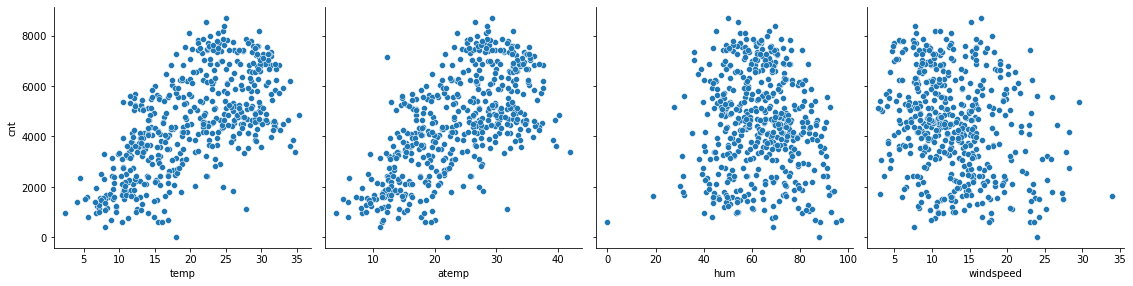

In [23]:
sns.pairplot(df_train, x_vars=[ 'temp', 'atemp', 'hum', 'windspeed'], y_vars='cnt',size=4, aspect=1, kind='scatter')
plt.show()

### temp, atemp and cnt has linear relation based on the above graph. 

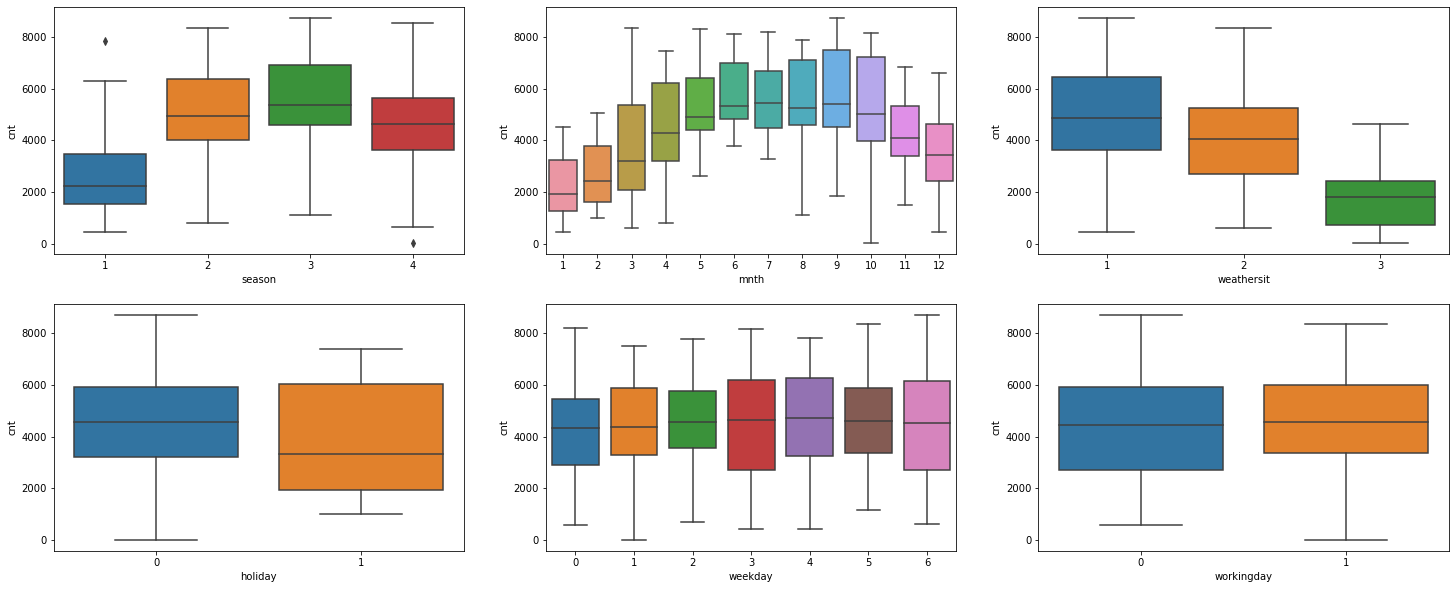

In [24]:
# Verify the categorical variable impact on the cnt using box plot
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikeSharing)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeSharing)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeSharing)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeSharing)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeSharing)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikeSharing)
plt.show()

### Categorical Variable observations:
1. Season 3 has high count followed by the season 2 and 4 has the high values
2. mnth 5,6,7,8,9,10 has significant count. Median between 4000 to 6000. So month also a good predicator for the dependant variables
3. weathersit has median value more than 4000 for 1. 2 and 3 has significant difference. This also a good predicator for the dependant variables
4. Huge bike booking happened on the working day than holiday. So holiday is not a good predicator for the dependant variables
5. There is no significant change seen across the weekday and workingday. This may or may not be a good predicator for the dependant variables

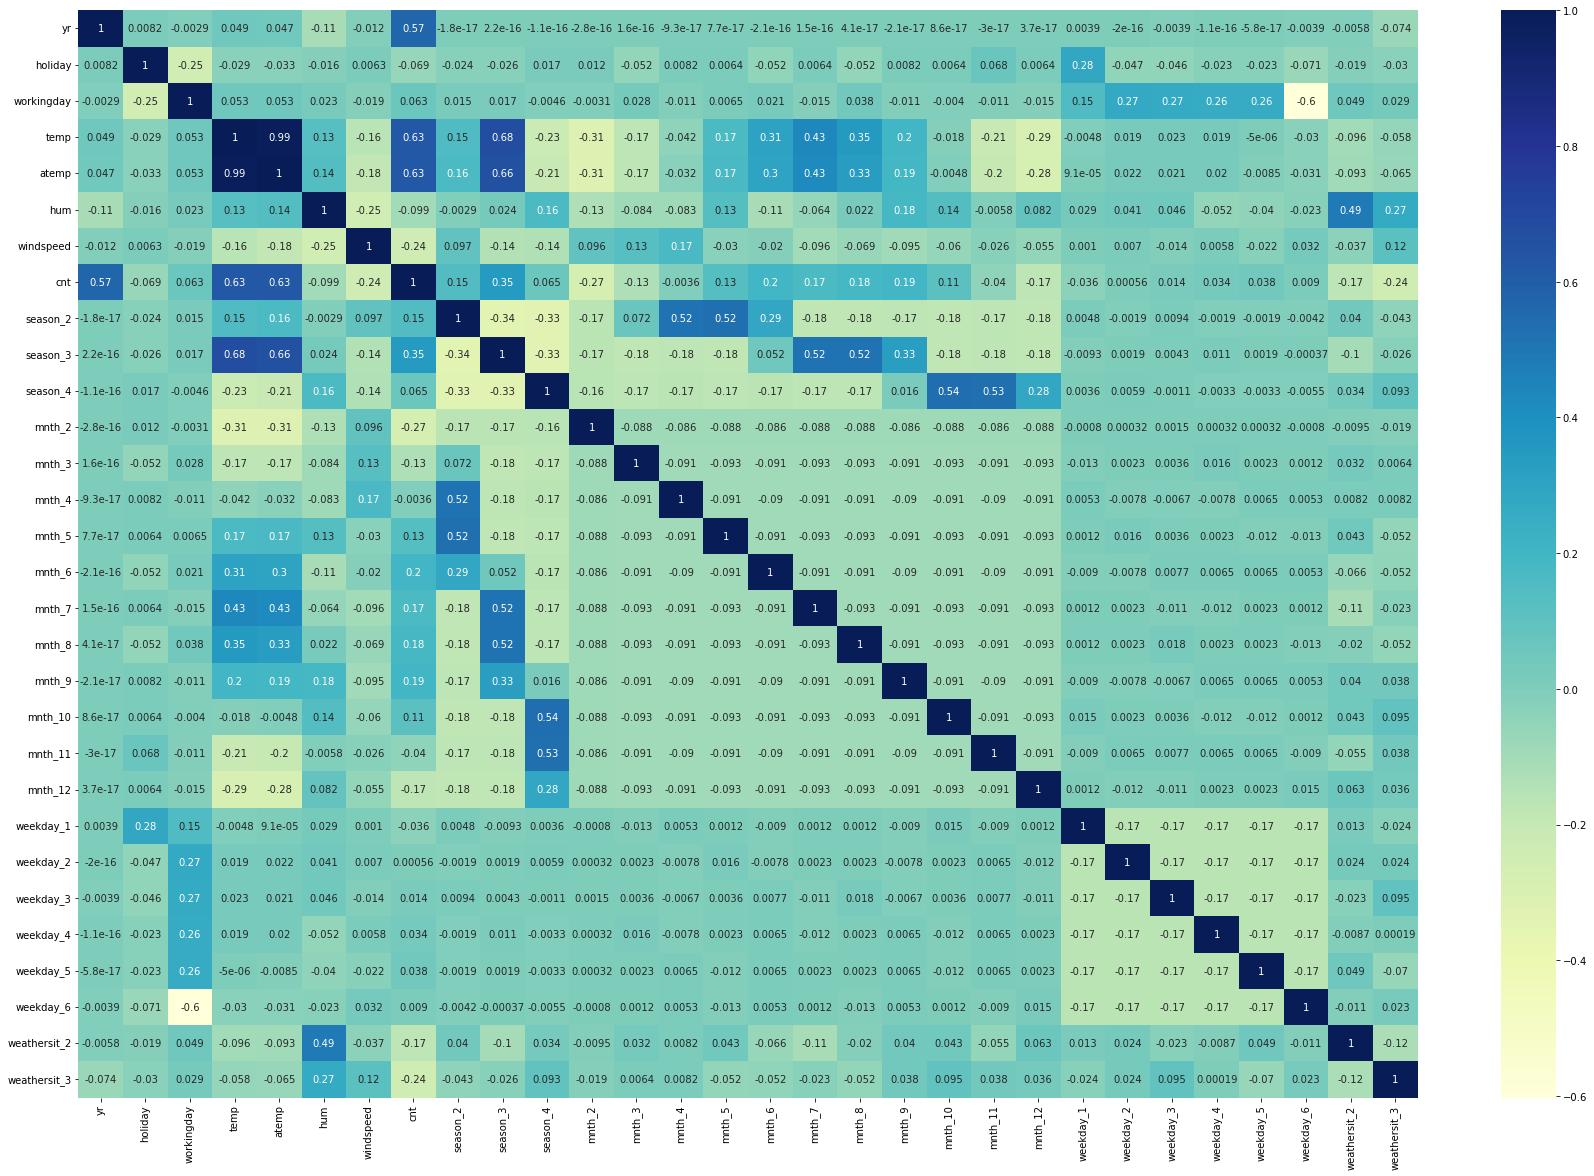

In [25]:
# Create a Heat map to see the corrolation between different features
plt.figure(figsize = (30,20))
sns.heatmap(bikeSharing_new.corr(), cmap="YlGnBu", annot = True)
plt.show()

### Rescaling the Feature:
cnt feature is high compare to other features. So rescaling will help to reduce the data to low and make comparable scale.


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [27]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0


In [28]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [29]:
y_train = df_train.pop('cnt')
X_train = df_train

### Building a linear model with all the features

In [30]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const           0.175618
yr              0.232208
holiday        -0.042394
workingday      0.043879
temp            0.401322
atemp           0.050628
hum            -0.151812
windspeed      -0.184388
season_2        0.086796
season_3        0.048580
season_4        0.153968
mnth_2          0.030389
mnth_3          0.063853
mnth_4          0.062565
mnth_5          0.087257
mnth_6          0.060862
mnth_7          0.023289
mnth_8          0.078641
mnth_9          0.144371
mnth_10         0.070260
mnth_11         0.020783
mnth_12         0.016994
weekday_1      -0.009946
weekday_2      -0.007753
weekday_3       0.005823
weekday_4       0.001806
weekday_5       0.011556
weekday_6       0.054533
weathersit_2   -0.061030
weathersit_3   -0.256697
dtype: float64

In [31]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          8.42e-181
Time:                        17:38:08   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1756      0.030      5.777   

In [32]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,weekday_4,inf
2,workingday,inf
23,weekday_3,inf
22,weekday_2,inf
21,weekday_1,inf
25,weekday_5,inf
1,holiday,inf
3,temp,447.70
4,atemp,383.54
5,hum,20.79


### Model 2: Dropping the weekday_4 which has high P values and build the model again

In [34]:
#Drop the column:
X = X_train.drop('weekday_4', 1,)

# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.params

#print the summary of the second model
print(lr_2.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          8.42e-181
Time:                        17:38:10   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1756      0.030      5.777   

### Model 3: Dropping the weekday_3 which has high P values and build the model again

In [35]:
#Drop the column:
X = X.drop('weekday_3', 1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()
lr_3.params

#print the summary of the third model
print(lr_3.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.9
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          8.49e-182
Time:                        17:38:11   Log-Likelihood:                 527.99
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     482   BIC:                            -881.4
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1754      0.030      5.777   

### Model 4: Dropping the atemp which has high P values & VIF and build the model again

In [36]:
#Drop the column:
X = X.drop('atemp', 1)

# Build a fourth fitted model
X_train_lm = sm.add_constant(X)
lr_4 = sm.OLS(y_train, X_train_lm).fit()
lr_4.params

#print the summary of the fourth model
print(lr_4.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.0
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          8.61e-183
Time:                        17:38:12   Log-Likelihood:                 527.92
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     483   BIC:                            -887.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1758      0.030      5.799   

### Model 5: Dropping the weekday_5 which has high P values and build the model again

In [37]:
#Drop the column:
X = X.drop('weekday_5', 1)

# Build a fifth fitted model
X_train_lm = sm.add_constant(X)
lr_5 = sm.OLS(y_train, X_train_lm).fit()
lr_5.params

#print the summary of the fifth model
print(lr_5.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.5
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          9.26e-184
Time:                        17:38:13   Log-Likelihood:                 527.77
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     484   BIC:                            -893.4
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1762      0.030      5.816   

### Model 6: Dropping the mnth_7 which has high P values and build the model again

In [38]:
#Drop the column:
X = X.drop('mnth_7', 1)

# Build a Sixth fitted model
X_train_lm = sm.add_constant(X)
lr_6 = sm.OLS(y_train, X_train_lm).fit()
lr_6.params

#print the summary of the new model
print(lr_6.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.4
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          9.74e-185
Time:                        17:38:15   Log-Likelihood:                 527.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     485   BIC:                            -899.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1771      0.030      5.863   

### Model 7: Dropping the mnth_11 which has high P values and build the model again

In [39]:
#Drop the column:
X = X.drop('mnth_11', 1)

# Build a seventh fitted model
X_train_lm = sm.add_constant(X)
lr_7 = sm.OLS(y_train, X_train_lm).fit()
lr_7.params

#print the summary of the new model
print(lr_7.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.7
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          9.45e-186
Time:                        17:38:16   Log-Likelihood:                 527.53
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     486   BIC:                            -905.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1783      0.030      5.934   

### Model 8: Dropping the mnth_12 which has high P values and build the model again

In [40]:
#Drop the column:
X = X.drop('mnth_12', 1)

# Build a eighth fitted model
X_train_lm = sm.add_constant(X)
lr_8 = sm.OLS(y_train, X_train_lm).fit()
lr_8.params

#print the summary of the new model
print(lr_8.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     128.5
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          8.44e-187
Time:                        17:38:17   Log-Likelihood:                 527.50
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     487   BIC:                            -911.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1789      0.030      5.982   

P Values are looks good however, VIF is very high for the temp and hum. 
As temp might be a significant feature for this model. So dropping the hum and check the values.

### Model 9: Dropping the hum which has high VIF values and build the model again

In [41]:
#Drop the column:
X = X.drop('hum', 1)

# Build a new fitted model
X_train_lm = sm.add_constant(X)
lr_9 = sm.OLS(y_train, X_train_lm).fit()
lr_9.params

#print the summary of the new model
print(lr_9.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     129.7
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          2.16e-184
Time:                        17:38:18   Log-Likelihood:                 519.07
No. Observations:                 510   AIC:                            -994.1
Df Residuals:                     488   BIC:                            -901.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0889      0.020      4.379   

### Model 10: Dropping the season_3 feature which has high VIF values and build the model again

In [42]:
#Drop the column:
X = X.drop('season_3', 1)

# Build a new fitted model
X_train_lm = sm.add_constant(X)
lr_10 = sm.OLS(y_train, X_train_lm).fit()
lr_10.params

#print the summary of the new model
print(lr_10.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     133.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.65e-183
Time:                        17:38:19   Log-Likelihood:                 514.34
No. Observations:                 510   AIC:                            -986.7
Df Residuals:                     489   BIC:                            -897.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0845      0.020      4.139   

### Model 11: Dropping the mnth_2 feature which has high P values and build the model again

In [43]:
#Drop the column:
X = X.drop('mnth_2', 1)

# Build a new fitted model
X_train_lm = sm.add_constant(X)
lr_11 = sm.OLS(y_train, X_train_lm).fit()
lr_11.params

#print the summary of the new model
print(lr_11.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     140.7
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.84e-184
Time:                        17:38:21   Log-Likelihood:                 514.03
No. Observations:                 510   AIC:                            -988.1
Df Residuals:                     490   BIC:                            -903.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0897      0.019      4.645   

### Model 12: Dropping the weekday_2 feature which has high P values and build the model again

In [44]:
#Drop the column:
X = X.drop('weekday_2', 1)

# Build a new fitted model
X_train_lm = sm.add_constant(X)
lr_12 = sm.OLS(y_train, X_train_lm).fit()
lr_12.params

#print the summary of the new model
print(lr_12.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     148.3
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          2.81e-185
Time:                        17:38:22   Log-Likelihood:                 513.37
No. Observations:                 510   AIC:                            -988.7
Df Residuals:                     491   BIC:                            -908.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0903      0.019      4.678   

### Model 13: Dropping the weekday_1 feature which has high P values and build the model again

In [45]:
#Drop the column:
X = X.drop('weekday_1', 1)

# Build a new fitted model
X_train_lm = sm.add_constant(X)
lr_13 = sm.OLS(y_train, X_train_lm).fit()
lr_13.params

#print the summary of the new model
print(lr_13.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     156.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          4.44e-186
Time:                        17:38:23   Log-Likelihood:                 512.64
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     492   BIC:                            -913.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0903      0.019      4.678   

### Model 14: Dropping the holiday feature which has high P values with low VIF and build the model again

In [46]:
#Drop the column:
X = X.drop('holiday', 1)

# Build a new fitted model
X_train_lm = sm.add_constant(X)
lr_14 = sm.OLS(y_train, X_train_lm).fit()
lr_14.params

#print the summary of the new model
print(lr_14.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.84e-186
Time:                        17:38:24   Log-Likelihood:                 510.88
No. Observations:                 510   AIC:                            -987.8
Df Residuals:                     493   BIC:                            -915.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0819      0.019      4.355   

### Model 15: Dropping the mnth_6 feature which has high P values with low VIF and build the model again

In [47]:
#Drop the column:
X = X.drop('mnth_6', 1)

# Build a new fitted model
X_train_lm = sm.add_constant(X)
lr_15 = sm.OLS(y_train, X_train_lm).fit()
lr_15.params

#print the summary of the new model
print(lr_15.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          8.82e-187
Time:                        17:38:25   Log-Likelihood:                 508.94
No. Observations:                 510   AIC:                            -985.9
Df Residuals:                     494   BIC:                            -918.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0792      0.019      4.212   

### Model 16: Dropping the mnth_4 feature which has high P values with low VIF and build the model again

In [48]:
#Drop the column:
X = X.drop('mnth_4', 1)

# Build a new fitted model
X_train_lm = sm.add_constant(X)
lr_16 = sm.OLS(y_train, X_train_lm).fit()
lr_16.params

#print the summary of the new model
print(lr_16.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.7
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.27e-187
Time:                        17:38:26   Log-Likelihood:                 508.21
No. Observations:                 510   AIC:                            -986.4
Df Residuals:                     495   BIC:                            -922.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0809      0.019      4.310   

### Model 17: Dropping the mnth_5 feature which has high P values with low VIF and build the model again

In [49]:
#Drop the column:
X = X.drop('mnth_5', 1)

# Build a new fitted model
X_train_lm = sm.add_constant(X)
lr_17 = sm.OLS(y_train, X_train_lm).fit()
lr_17.params

#print the summary of the new model
print(lr_17.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.3
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.13e-188
Time:                        17:38:27   Log-Likelihood:                 507.94
No. Observations:                 510   AIC:                            -987.9
Df Residuals:                     496   BIC:                            -928.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0808      0.019      4.310   

### Model 18: Dropping the mnth_3 feature which has high P values with low VIF and build the model again

In [50]:
#Drop the column:
X = X.drop('mnth_3', 1)

# Build a new fitted model
X_train_lm = sm.add_constant(X)
lr_18 = sm.OLS(y_train, X_train_lm).fit()
lr_18.params

#print the summary of the new model
print(lr_18.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          2.86e-189
Time:                        17:38:28   Log-Likelihood:                 506.56
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     497   BIC:                            -932.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0856      0.019      4.610   

### Model 19: Dropping the mnth_10 feature which has high P values with low VIF and build the model again

In [51]:
#Drop the column:
X = X.drop('mnth_10', 1)

# Build a new fitted model
X_train_lm = sm.add_constant(X)
lr_19 = sm.OLS(y_train, X_train_lm).fit()
lr_19.params

#print the summary of the new model
print(lr_19.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          2.00e-189
Time:                        17:38:29   Log-Likelihood:                 504.10
No. Observations:                 510   AIC:                            -984.2
Df Residuals:                     498   BIC:                            -933.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0813      0.019      4.384   

### Model 20: mnth_8 feature has low P values however it may help to reduce the temp VIF. So dropping this column and build the model again

In [52]:
#Drop the column:
X = X.drop('mnth_8', 1)

# Build a new fitted model
X_train_lm = sm.add_constant(X)
lr_20 = sm.OLS(y_train, X_train_lm).fit()
lr_20.params

#print the summary of the new model
print(lr_20.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.47e-188
Time:                        17:38:30   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0753      0.019      4.051   

### VIF and the P-Values are in acceptable range and this is good model for predications.

### Residual Analysis of the train data

In [53]:
y_train_cnt = lr_20.predict(X_train_lm)

Text(0.5, 0, 'Errors')

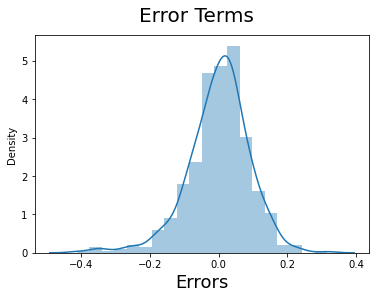

In [54]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Error terms are normally distributed. So this model is satisfied the linear regression assumption.

### Making Predictions Using the Final Model

Making prediction with the final model which is model 20.

Applying the scaling on the test sets

In [55]:
# Apply scaler() to all the columns except the 'dummy' variables in df_test
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [56]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,...,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,...,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
df_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

#### Dividing into X_test and y_test

In [58]:
y_test = df_test.pop('cnt')
X_test = df_test

In [59]:
# Adding constant variable to test dataframe
X_test_m20 = sm.add_constant(X_test)

In [60]:
# Creating X_test_m20 dataframe by dropping variables from X_test_m20

X_test_m20 = X_test_m20.drop(['holiday', 'atemp', 'hum', 'season_3', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5'], axis = 1)

In [61]:
X_test_m20.columns

Index(['const', 'yr', 'workingday', 'temp', 'windspeed', 'season_2',
       'season_4', 'mnth_9', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [62]:
# Making predictions using the 20th model

y_pred_m20 = lr_20.predict(X_test_m20)

### Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

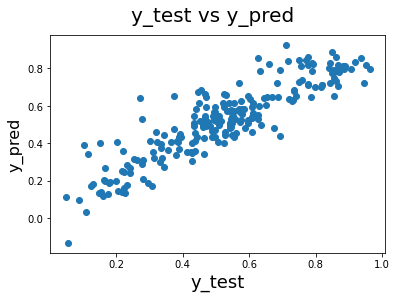

In [63]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m20)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [64]:
# 0.836 is the R2 value for training data set. check the r2 value for test
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m20)

0.7955844377237249

### Final Result:

#### Bike sharing count equation of our best fitted line is:

cnt = 0.233 X yr + 0.056 X workingday + 0.55 X temp + 0.087 X season_2 + 0.132 X season_4 + 0.097 X mnth_9 + 0.068 X 
      weekday_6 - 0.081 X weathersit_2 - 0.288 X weathersit_3 - 0.155 X windspeed
      
#### Train R^2 is 0.836 and Test R^2 is 0.797
This model is good and it can be generalize for various dataset.

#### Business Solution from this Model:
    Based on this model, the below predictor variables that influenced the bike renting. So these variables are utmost importent when planning for the after pandamic business.
1. Temperature - When temperature increase one units, the bike renting numbers will increase 0.5499 units
2. Weather - When weathersit - 3 increase one units, the bike renting numbers will decrease by 0.288 units
    Note: weathersit - 3  is Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
3. Year - Based on this model outcome, the bike renting numbers will decrease by 0.233 units on every year
4. Season - Season =4 increase a unit, the bike renting number will increase by 0.132 units.
5. Windspeed - Bike renting is decreasing 0.155 units if the windspeed increase a unit.
